
Fashion Data

pca.fit(X) needs X to be "array-like, shape (n_samples, n_features)".
See here: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA.fit

You can use this code to bring the data into a format to be used with PCA. 
Note, that the images of men clothing or in a folder called 'man_200'.
Note also, that you would need to do this for two types of your choosing to 
perform classification.

It's a good idea to print out the arrays and shapes at each step to know what's
happening in the background!

There are probably a million ways to do this, don't feel constrained to use this snippet.

Code Link: https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

In [1]:
from glob import glob
from PIL import Image
from resizeimage import resizeimage
import numpy as np

# create paths for all images
man_images = glob('man_200/*')

man_flattened = []
# for each image path
for path in man_images:
    # open it as a read file in binary mode
    with open(path, 'r+b') as f:
        # open it as an image
        with Image.open(f) as image:
            # resize the image to be more manageable
            cover = resizeimage.resize_cover(image, [20, 10])
            # flatten the matrix to an array and append it to all flattened images
            man_flattened.append((np.array(cover).flatten(), 0))

            

# Flatten it once more
man_flattened = np.asarray(man_flattened)

# Declare which are the X and Y inputs
X_man = man_flattened[:,0]
Y_man = man_flattened[:,1]

# Use np.stack to put the data into the right dimension
X_man = np.stack(i for i in X_man)
Y_man = np.stack(i for i in Y_man)


/var/folders/0h/xyv81g2n7sj6zr0c9cw30gkc0000gn/T/ipykernel_1820/4029016481.py:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  man_flattened = np.asarray(man_flattened)
/Users/swimmingcircle/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py:3377: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


In [2]:
woman_images = glob('woman_200/*')
woman_flattened = []
# for each image path
for path in woman_images:
    # open it as a read file in binary mode
    with open(path, 'r+b') as f:
        # open it as an image
        with Image.open(f) as image:
            # resize the image to be more manageable
            cover = resizeimage.resize_cover(image, [20, 10])
            # flatten the matrix to an array and append it to all flattened images
            woman_flattened.append((np.array(cover).flatten(), 1))


# Flatten it once more
woman_flattened = np.asarray(woman_flattened)

# Declare which are the X and Y inputs
X_wom = woman_flattened[:,0]
Y_wom = woman_flattened[:,1]

# Use np.stack to put the data into the right dimension
X_wom = np.stack(i for i in X_wom)
Y_wom = np.stack(i for i in Y_wom)


/var/folders/0h/xyv81g2n7sj6zr0c9cw30gkc0000gn/T/ipykernel_1820/2458865537.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  woman_flattened = np.asarray(woman_flattened)


In [3]:
X_man.shape, Y_man.shape

((1242, 600), (1242,))

In [4]:
X_wom.shape, Y_wom.shape

((1270, 600), (1270,))

In [5]:
X = np.vstack((X_man, X_wom))
Y = np.hstack((Y_man, Y_wom))
X.shape, Y.shape

((2512, 600), (2512,))

In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

model = LinearDiscriminantAnalysis()
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, Y, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean Accuracy: 0.577 (0.032)


In [36]:
#Grid search to find the best parameter score.
from sklearn.model_selection import GridSearchCV
# define grid
grid = dict()
grid['solver'] = ['svd', 'lsqr', 'eigen']
# define search
search = GridSearchCV(model, grid, scoring='accuracy', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, Y)
# summarize
print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

Mean Accuracy: 0.577
Config: {'solver': 'svd'}


In [24]:
transformed_X = pd.DataFrame(model.fit(X, Y).transform(X), columns = ['X'])
finalDf = pd.concat([transformed_X, pd.DataFrame(Y, columns = ['Y'])], axis = 1)
finalDf

,X,Y
0,-2.236593,0
1,-2.824244,0
2,-0.707215,0
3,-0.478124,0
4,-1.030399,0
...,...,...
2507,1.326585,1
2508,0.085164,1
2509,-1.750312,1
2510,0.512316,1


<AxesSubplot:xlabel='X', ylabel='Count'>

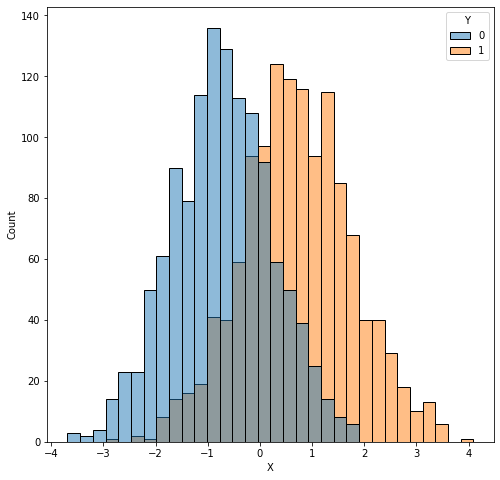

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize = (8,8))
 
#create LDA plot
targets = [0,1]
colors = ['r', 'b']
sns.histplot(finalDf, x = 'X', hue = 'Y')

In [37]:
#try quadratic discriminant
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qua_model = QuadraticDiscriminantAnalysis()
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, Y, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean Accuracy: 0.577 (0.032)
